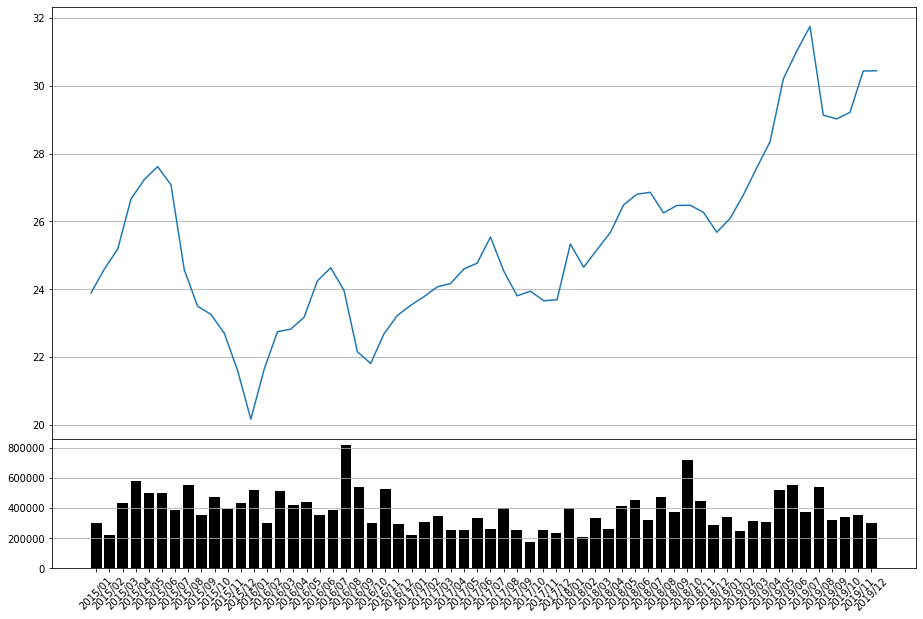

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

raw_data = open('2886 兆豐金.csv').readlines()
revise_data = [line.strip('\n').split(',') for line in raw_data[1:]]

stock_date = [datetime.strptime(line[0], '%m/%d/%Y').date() for line in revise_data]
stock_close = [float(line[1]) for line in revise_data]
stock_volume =[float(line[2]) for line in revise_data]

monthly_days = np.zeros([5, 12])

for i in range(2015, 2020):
    for j in range(1, 13):
        for k in stock_date:
            if k.year == i and k.month == j:
                monthly_days[i - 2015][j - 1] = monthly_days[i - 2015][j - 1] + 1
            else:
                continue

monthly_days = monthly_days.reshape([60, 1])

monthly_price_total = []
temp_price = 0
monthly_volume_total = []
temp_volume = 0
now = 1

for i in range(0, 60):
    while True:
        if stock_date[now - 1].month == stock_date[now].month and now < np.size(stock_close) - 1:
            temp_price = temp_price + stock_close[now - 1]
            temp_volume = temp_volume + stock_volume[now - 1]
            now = now + 1
        else:
            temp_price = temp_price + stock_close[now - 1]
            temp_volume = temp_volume + stock_volume[now - 1]
            now = now + 1
            monthly_price_total.append(temp_price)
            monthly_volume_total.append(temp_volume)
            temp_price = 0
            temp_volume = 0
            break
            
monthly_price_total[59] = monthly_price_total[59] + stock_close[ np.size(stock_close) - 1]
monthly_volume_total[59] = monthly_volume_total[59] + stock_volume[np.size(stock_volume) - 1]

monthly_price_average = np.zeros(60)

for i in range(0, 60):
    monthly_price_average[i] = monthly_price_total[i] / monthly_days[i]

fig = plt.figure(figsize = (12 , 6))

x_axis = []

for i in range(2015,2020):
    for j in range(1,13):
        if(j < 10):
            x_axis.append(str(i) + '/0' + str(j))
        else:
            x_axis.append(str(i) + '/' + str(j))

ax1 = fig.add_axes([0,0.3,1,1])
ax2 = fig.add_axes([0,0,1,0.3])

ax1.plot(x_axis, monthly_price_average)
ax2.bar(x_axis, monthly_volume_total, color='black')

ax1.grid(axis = 'y') 
ax2.grid(axis = 'y')

plt.xticks(rotation=45)
plt.gcf().autofmt_xdate()
plt.show()